In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing filterwarnings to ignore warning messages**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson

**Importing Dataset**

In [4]:
data = pd.read_excel("/content/drive/MyDrive/MVA/Life Expectancy Cleaned (2000 to 2007).xlsx")

In [5]:
data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2007,Developing,57.5,295.000000,82.000000,0.02,10.910156,63.000000,831,...,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,15.3,15.5,0.415,8.4
1,Albania,2007,Developing,75.9,171.347059,1.000000,5.58,32.246552,98.000000,22,...,99.0,6.10,98.0,0.1,363.136850,2.971700e+04,1.6,1.7,0.703,11.6
2,Algeria,2007,Developing,73.8,129.000000,20.000000,0.44,320.323924,55.000000,0,...,95.0,3.82,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
3,Angola,2007,Developing,48.2,375.000000,87.000000,6.35,184.821345,73.000000,831,...,75.0,3.38,73.0,1.8,2878.837144,2.997687e+06,9.6,9.6,0.454,7.7
4,Antigua and Barbuda,2007,Developing,75.0,144.000000,42.120301,8.64,257.966531,97.000000,0,...,98.0,4.27,99.0,0.1,14252.294520,1.853530e+07,3.4,3.3,0.781,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.000000,11.000000,8.01,0.000000,55.000000,22,...,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
1460,Viet Nam,2000,Developing,73.4,139.000000,33.000000,1.60,0.000000,74.035294,831,...,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569,10.4
1461,Yemen,2000,Developing,68.0,252.000000,48.000000,0.07,0.000000,55.000000,0,...,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
1462,Zambia,2000,Developing,45.6,399.000000,44.000000,2.62,45.616880,74.035294,831,...,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


**Data Pre-Processing**

**Creating a copy of original dataset**



In [6]:
df = data.copy()

In [7]:
df.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2007,Developing,57.5,295.000000,82.000000,0.02,10.910156,63.0,831,...,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,15.3,15.5,0.415,8.4
1,Albania,2007,Developing,75.9,171.347059,1.000000,5.58,32.246552,98.0,22,...,99.0,6.10,98.0,0.1,363.136850,2.971700e+04,1.6,1.7,0.703,11.6
2,Algeria,2007,Developing,73.8,129.000000,20.000000,0.44,320.323924,55.0,0,...,95.0,3.82,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
3,Angola,2007,Developing,48.2,375.000000,87.000000,6.35,184.821345,73.0,831,...,75.0,3.38,73.0,1.8,2878.837144,2.997687e+06,9.6,9.6,0.454,7.7
4,Antigua and Barbuda,2007,Developing,75.0,144.000000,42.120301,8.64,257.966531,97.0,0,...,98.0,4.27,99.0,0.1,14252.294520,1.853530e+07,3.4,3.3,0.781,14.5
5,Argentina,2007,Developing,74.8,129.000000,10.000000,8.16,1077.712092,85.0,0,...,92.0,6.49,91.0,0.1,7193.617640,3.997224e+06,1.1,0.9,0.788,16.3
6,Armenia,2007,Developing,73.5,132.000000,1.000000,3.99,44.572200,85.0,1,...,52.0,4.31,88.0,0.1,3138.887300,2.933560e+05,2.0,2.1,0.707,11.7
7,Australia,2007,Developed,81.3,66.000000,1.000000,10.56,872.598609,94.0,11,...,92.0,8.53,92.0,0.1,4991.982890,2.827600e+04,0.7,0.6,0.918,19.0
8,Austria,2007,Developed,81.0,171.347059,42.120301,12.50,1077.712092,85.0,20,...,85.0,1.40,85.0,0.1,16784.346160,8.295487e+06,1.7,1.9,0.860,15.2
9,Azerbaijan,2007,Developing,73.0,14.000000,6.000000,1.02,176.010711,62.0,0,...,81.0,5.10,79.0,0.1,3851.437869,8.581300e+04,2.8,2.9,0.708,11.6


In [8]:
df.tail(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
1454,United Republic of Tanzania,2000,Developing,49.2,399.0,95.000000,3.89,0.000000,74.035294,831,...,64.0,2.64,79.0,1.8,4708.515191,9.440444e+06,8.3,8.3,0.512214,10.512717
1455,United States of America,2000,Developed,76.8,114.0,28.000000,8.21,0.000000,55.000000,85,...,52.0,11.66,94.0,0.1,4708.515191,9.440444e+06,0.8,0.7,0.512214,10.512717
1456,Uruguay,2000,Developing,75.1,131.0,1.000000,6.65,645.958382,92.000000,0,...,92.0,7.82,52.0,0.1,6871.897677,3.321245e+06,1.8,1.7,0.738000,14.000000
1457,Uzbekistan,2000,Developing,67.1,189.0,30.000000,1.60,48.509417,74.035294,80,...,99.0,5.29,99.0,0.1,558.221144,2.465400e+04,3.4,3.4,0.291000,10.600000
1458,Vanuatu,2000,Developing,69.0,18.0,50.888889,1.21,21.900752,55.000000,9,...,67.0,3.28,71.0,0.1,1469.849149,1.856300e+04,1.7,1.7,0.291000,9.600000
1459,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11.000000,8.01,0.000000,55.000000,22,...,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670000,10.600000
1460,Viet Nam,2000,Developing,73.4,139.0,33.000000,1.60,0.000000,74.035294,831,...,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569000,10.400000
1461,Yemen,2000,Developing,68.0,252.0,48.000000,0.07,0.000000,55.000000,0,...,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436000,7.700000
1462,Zambia,2000,Developing,45.6,399.0,44.000000,2.62,45.616880,74.035294,831,...,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418000,9.600000
1463,Zimbabwe,2000,Developing,46.0,399.0,24.000000,1.68,0.000000,79.000000,831,...,78.0,7.10,78.0,1.8,547.358878,1.222225e+07,11.0,11.2,0.434000,9.800000


**To Find Data type and missing values in data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1464 non-null   object 
 1   Year                             1464 non-null   int64  
 2   Status                           1464 non-null   object 
 3   Life_Expectancy                  1464 non-null   float64
 4   Adult_Mortality                  1464 non-null   float64
 5   Infant_Deaths                    1464 non-null   float64
 6   Alcohol                          1464 non-null   float64
 7   Percentage_Expenditure           1464 non-null   float64
 8   HepatitisB                       1464 non-null   float64
 9   Measles                          1464 non-null   int64  
 10  BMI                              1464 non-null   float64
 11  Under_Five_Deaths                1464 non-null   float64
 12  Polio               



1.   No missing values present in the data set.
2.   Independent variables are of float data type where as dependent variable(Life_Expectancy) are of float data type.




In [10]:
df.shape

(1464, 22)

In [11]:
df.size

32208

**Descriptive statistics**

In [ ]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.248795,167.845455,28.607323,4.640667,281.501093,83.671293,220.691287,28.262067,38.640545,85.514684,5.972192,85.469564,0.526991,5033.943592,7.508368e+06,4.703351,4.720470,0.640659,12.049874
std,4.613841,9.462136,104.544496,25.699534,3.910036,384.161450,13.848933,329.192321,4.347136,37.732345,15.270927,2.302224,15.217611,0.675962,5408.511820,8.646842e+06,3.925702,3.964268,0.171622,3.085673
min,2000.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,21.200000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,4.900000
25%,2004.000000,63.200000,84.000000,4.000000,1.092500,4.685343,74.099237,0.000000,25.600000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,157.000000,28.000000,4.140000,64.912906,87.000000,17.000000,29.153086,34.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,360.250000,29.444048,60.014815,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,399.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,34.700000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000




*   describe() function tell us five number summary that is min, max, quartile, mean, count.




**Finding Missing values in data set if any**

In [12]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_Years               0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64



*   Here we can see that, there are no missing values present in data



**Correlation**

In [13]:
df.corr()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
Year,1.000000,0.071106,-0.028977,-0.045316,0.036855,0.090198,0.213268,-0.165168,0.047883,-0.043476,0.109808,0.017661,0.129214,-0.011041,0.107835,0.110995,-0.000941,-0.002110,0.135789,0.129496
Life_Expectancy,0.071106,1.000000,-0.615677,-0.212786,0.399829,0.530848,0.267646,-0.381356,0.499973,-0.290374,0.596328,0.200900,0.605631,-0.807535,0.495824,0.016960,-0.512041,-0.511869,0.749073,0.721501
Adult_Mortality,-0.028977,-0.615677,1.000000,0.096366,-0.186275,-0.327774,-0.161762,0.193812,-0.284566,0.141967,-0.308871,-0.111161,-0.310492,0.519612,-0.289316,0.002113,0.313253,0.326770,-0.446729,-0.397606
Infant_Deaths,-0.045316,-0.212786,0.096366,1.000000,-0.083647,-0.090508,-0.187421,0.290711,-0.340325,0.969480,-0.230284,-0.103991,-0.237237,0.105987,-0.036620,0.156888,0.208519,0.224913,-0.179442,-0.197679
Alcohol,0.036855,0.399829,-0.186275,-0.083647,1.000000,0.407578,0.116860,-0.282076,0.211840,-0.118923,0.303969,0.310527,0.332507,-0.195212,0.416502,-0.022796,-0.450239,-0.436389,0.494374,0.558657
Percentage_Expenditure,0.090198,0.530848,-0.327774,-0.090508,0.407578,1.000000,0.139508,-0.238139,0.180300,-0.128710,0.318181,0.179892,0.311535,-0.334196,0.819023,-0.052487,-0.348293,-0.347915,0.600373,0.579831
HepatitisB,0.213268,0.267646,-0.161762,-0.187421,0.116860,0.139508,1.000000,-0.277112,0.215064,-0.217189,0.498303,0.034575,0.512167,-0.213813,0.144309,0.019938,-0.126162,-0.139481,0.262584,0.242200
Measles,-0.165168,-0.381356,0.193812,0.290711,-0.282076,-0.238139,-0.277112,1.000000,-0.399534,0.332393,-0.350679,-0.222665,-0.352988,0.235560,-0.215838,0.196663,0.391321,0.394240,-0.282675,-0.371920
BMI,0.047883,0.499973,-0.284566,-0.340325,0.211840,0.180300,0.215064,-0.399534,1.000000,-0.396649,0.374446,0.144709,0.399644,-0.421397,0.176903,-0.022230,-0.490444,-0.481755,0.387498,0.404539
Under_Five_Deaths,-0.043476,-0.290374,0.141967,0.969480,-0.118923,-0.128710,-0.217189,0.332393,-0.396649,1.000000,-0.290640,-0.114201,-0.299548,0.178430,-0.082640,0.149145,0.250600,0.262554,-0.252588,-0.271409




*   Independent variable is Highly Correlated with dependent variable with the value of correlation 0.98



**Data Visualization**

In [14]:
dfc = df.iloc[:, 3:]
dfc.head(5)

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,57.5,295.000000,82.000000,0.02,10.910156,63.0,831,21.200000,113.000000,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,15.3,15.5,0.415,8.4
1,75.9,171.347059,1.000000,5.58,32.246552,98.0,22,29.261111,1.000000,99.0,6.10,98.0,0.1,363.136850,2.971700e+04,1.6,1.7,0.703,11.6
2,73.8,129.000000,20.000000,0.44,320.323924,55.0,0,29.261111,23.000000,95.0,3.82,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
3,48.2,375.000000,87.000000,6.35,184.821345,73.0,831,21.200000,138.000000,75.0,3.38,73.0,1.8,2878.837144,2.997687e+06,9.6,9.6,0.454,7.7
4,75.0,144.000000,42.120301,8.64,257.966531,97.0,0,34.700000,58.358209,98.0,4.27,99.0,0.1,14252.294520,1.853530e+07,3.4,3.3,0.781,14.5


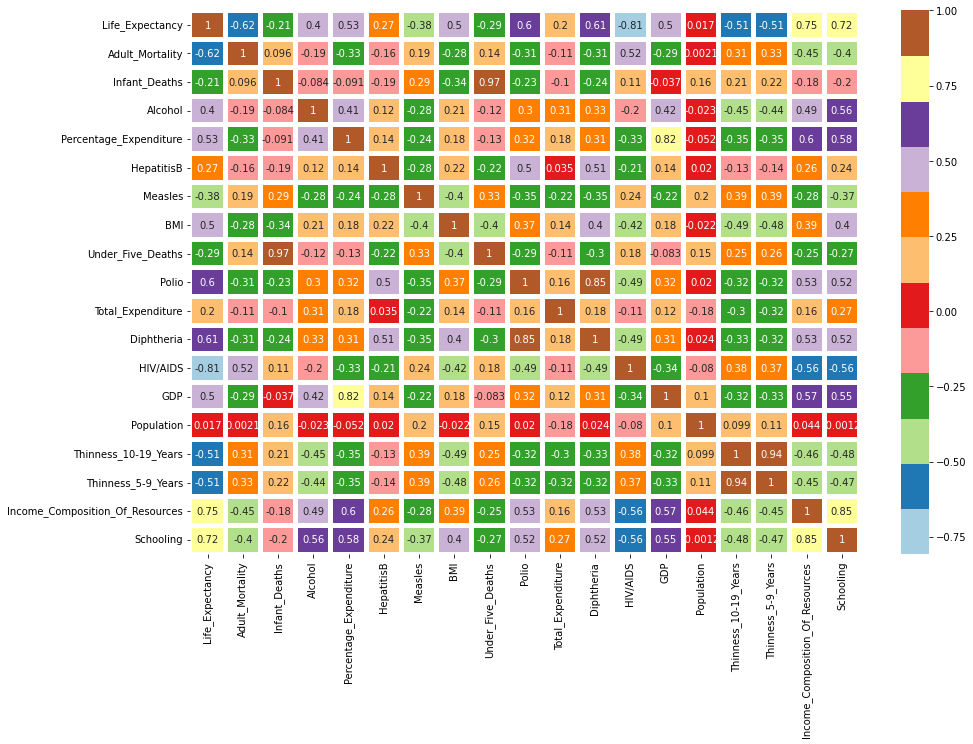

In [15]:
plt.figure(figsize= (15,10))
sns.heatmap(dfc.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

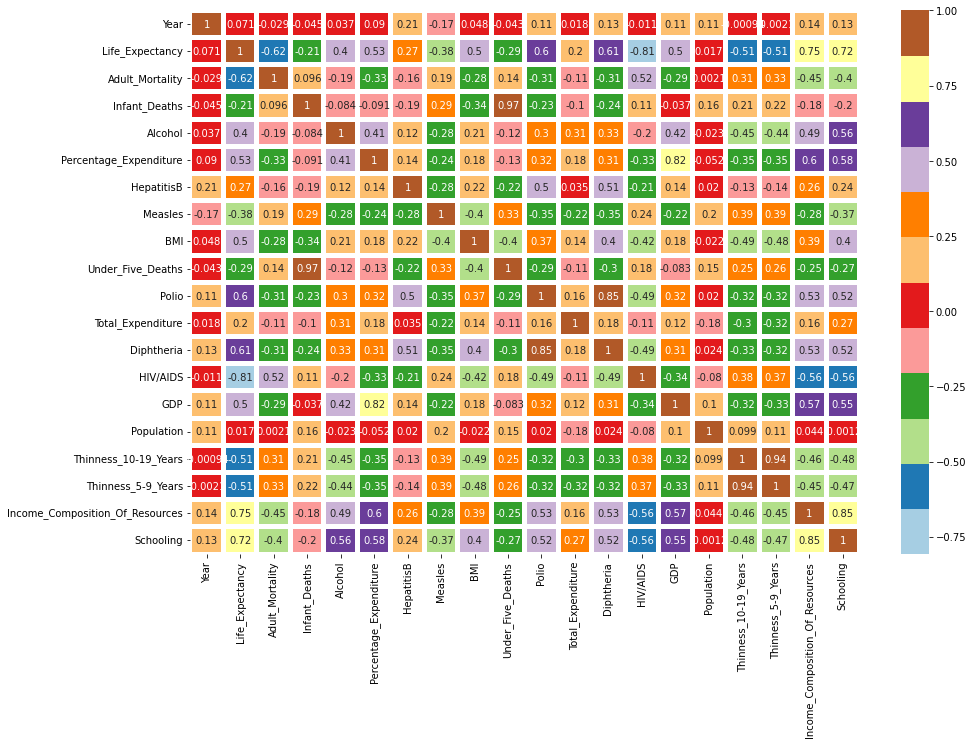

In [16]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

**Checking Assumption of Linear Regression**

**Linearity**


> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable



**From Scatter Plot We can observe that there is a positive linear correlation between Temperature and Revenue.**

**Data Prepration**

**Dividing the data frame to independent and dependent variable**

In [17]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

In [18]:
x = df.iloc[:, 4:]
y = df['Life_Expectancy']

In [19]:
x

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,295.000000,82.000000,0.02,10.910156,63.000000,831,21.200000,113.000000,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,15.3,15.5,0.415,8.4
1,171.347059,1.000000,5.58,32.246552,98.000000,22,29.261111,1.000000,99.0,6.10,98.0,0.1,363.136850,2.971700e+04,1.6,1.7,0.703,11.6
2,129.000000,20.000000,0.44,320.323924,55.000000,0,29.261111,23.000000,95.0,3.82,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
3,375.000000,87.000000,6.35,184.821345,73.000000,831,21.200000,138.000000,75.0,3.38,73.0,1.8,2878.837144,2.997687e+06,9.6,9.6,0.454,7.7
4,144.000000,42.120301,8.64,257.966531,97.000000,0,34.700000,58.358209,98.0,4.27,99.0,0.1,14252.294520,1.853530e+07,3.4,3.3,0.781,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,168.000000,11.000000,8.01,0.000000,55.000000,22,28.000926,13.000000,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
1460,139.000000,33.000000,1.60,0.000000,74.035294,831,28.000926,43.000000,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569,10.4
1461,252.000000,48.000000,0.07,0.000000,55.000000,0,31.200000,66.000000,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
1462,399.000000,44.000000,2.62,45.616880,74.035294,831,21.200000,72.000000,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


In [20]:
y

0       57.5
1       75.9
2       73.8
3       48.2
4       75.0
        ... 
1459    72.5
1460    73.4
1461    68.0
1462    45.6
1463    46.0
Name: Life_Expectancy, Length: 1464, dtype: float64

In [21]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [22]:
x

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,295.000000,82.000000,0.02,10.910156,63.000000,831,21.200000,113.000000,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,15.3,15.5,0.415,8.4
1,171.347059,1.000000,5.58,32.246552,98.000000,22,29.261111,1.000000,99.0,6.10,98.0,0.1,363.136850,2.971700e+04,1.6,1.7,0.703,11.6
2,129.000000,20.000000,0.44,320.323924,55.000000,0,29.261111,23.000000,95.0,3.82,95.0,0.1,3935.183343,3.437600e+04,6.0,5.9,0.690,12.3
3,375.000000,87.000000,6.35,184.821345,73.000000,831,21.200000,138.000000,75.0,3.38,73.0,1.8,2878.837144,2.997687e+06,9.6,9.6,0.454,7.7
4,144.000000,42.120301,8.64,257.966531,97.000000,0,34.700000,58.358209,98.0,4.27,99.0,0.1,14252.294520,1.853530e+07,3.4,3.3,0.781,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,168.000000,11.000000,8.01,0.000000,55.000000,22,28.000926,13.000000,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
1460,139.000000,33.000000,1.60,0.000000,74.035294,831,28.000926,43.000000,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569,10.4
1461,252.000000,48.000000,0.07,0.000000,55.000000,0,31.200000,66.000000,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
1462,399.000000,44.000000,2.62,45.616880,74.035294,831,21.200000,72.000000,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


In [23]:
df = x.copy()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [26]:
compute_vif(x.columns).sort_values('VIF', ascending=False)

,Variable,VIF
7,Under_Five_Deaths,20.143053
1,Infant_Deaths,18.899629
14,Thinness_10-19_Years,8.760920
15,Thinness_5-9_Years,8.673617
17,Schooling,4.555578
16,Income_Composition_Of_Resources,4.451472
10,Diphtheria,4.098279
8,Polio,3.909294
3,Percentage_Expenditure,3.603844
12,GDP,3.457281


In [27]:
df2 = df.copy()
df2['Children'] = df.apply(lambda x: x['Infant_Deaths'] + x['Under_Five_Deaths'],axis=1)

df2['Thinness'] = df.apply(lambda x: x['Thinness_5-9_Years'] + x['Thinness_10-19_Years'],axis=1)
v = df2.drop(['Infant_Deaths','Under_Five_Deaths','Thinness_5-9_Years','Thinness_10-19_Years'],axis=1)

In [28]:
df = v.copy()

In [29]:
compute_vif(v.columns).sort_values('VIF', ascending=False)

,Variable,VIF
13,Schooling,4.539298
12,Income_Composition_Of_Resources,4.438933
8,Diphtheria,4.088001
6,Polio,3.907361
2,Percentage_Expenditure,3.583582
10,GDP,3.430880
9,HIV/AIDS,2.059016
15,Thinness,1.825198
1,Alcohol,1.752060
5,BMI,1.698441


In [30]:
v.head(2)

,Adult_Mortality,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income_Composition_Of_Resources,Schooling,Children,Thinness
0,295.000000,0.02,10.910156,63.0,831,21.200000,63.0,6.73,63.0,0.1,369.835796,26616792.0,0.415,8.4,195.0,30.8
1,171.347059,5.58,32.246552,98.0,22,29.261111,99.0,6.10,98.0,0.1,363.136850,29717.0,0.703,11.6,2.0,3.3


In [31]:
x = v.copy()

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Spliting the X,Y into train and test**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=0) 

**Training the Algorithm**

In [34]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [35]:
regressor.score(x_train,y_train)

0.8463423971053763

In [36]:
#Printing the model coefficients
print(regressor.intercept_)

67.87145136370304


In [37]:
# pair the feature names with the coefficients
list(zip(X, regressor.coef_))

[(array([ 1.11093721, -1.18669701, -0.67510739, -1.34444951,  1.67064334,
         -1.46829453, -1.29999409,  0.47525003, -1.26307138, -0.6745827 ,
         -0.75478023,  2.24502565, -1.06219084, -0.96204823,  1.84220193,
          2.58634608]), -1.9103559146358162),
 (array([-0.02247287,  0.2087975 , -0.61758736,  1.23122117, -0.65457198,
          0.23585622,  0.9421059 ,  0.18321241,  0.89641987, -0.6745827 ,
         -0.75606716, -0.85172955,  0.53031613,  0.03600218, -1.05333798,
         -0.80345365]), 0.30115786334733974),
 (array([-0.41062849, -1.08128196,  0.15903014, -1.93317424, -0.71780404,
          0.23585622,  0.69298367, -0.87368562,  0.71132062, -0.6745827 ,
         -0.06984299, -0.85118689,  0.45843214,  0.25432571, -0.43822329,
          0.25662917]), 1.1073740796735438),
 (array([ 1.84422189,  0.40205844, -0.20626643, -0.6085436 ,  1.67064334,
         -1.46829453, -0.55262743, -1.0776484 , -0.64607388,  1.70582482,
         -0.27277716, -0.50603239, -0.84653885, -

In [38]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.8463423971053763
Test Score: 0.8306841950984366


In [39]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 67.87145136370304
Coefficient is : [-1.91035591  0.30115786  1.10737408 -0.3950759  -0.53087456  0.54311633
  0.48866902  0.12718608  0.90550139 -4.2514004  -0.05323315  0.03725697
  1.75753319  0.42860386 -0.24011213 -0.39777448]


In [40]:
y_predic = regressor.predict(x_test)
y_predic

array([77.86140268, 69.57179846, 66.02929302, 77.77525526, 80.18565294,
       69.16610909, 75.40636364, 61.3485421 , 72.5008302 , 78.38919875,
       56.89757637, 78.2714616 , 73.41827356, 72.59751212, 80.18530646,
       71.82080501, 74.71647003, 74.72620075, 79.88685123, 73.27885845,
       73.54515548, 74.06281698, 80.4489719 , 51.30346786, 63.72082014,
       52.65293801, 76.0554592 , 51.26184847, 64.57572699, 70.50660221,
       74.44606837, 65.24860963, 80.29882314, 50.32209657, 52.33234885,
       75.52551327, 69.85953703, 54.68180817, 75.0967295 , 62.99914275,
       72.49841713, 69.14455028, 78.17165156, 81.02611268, 72.16905085,
       58.58402346, 76.21000546, 69.67224275, 59.46964123, 62.84077783,
       73.14234627, 78.60743416, 74.29139004, 77.5495086 , 55.92712173,
       77.43152945, 67.40614119, 49.80539323, 73.57443777, 76.45449711,
       53.04639828, 73.70679423, 70.02191681, 71.84953249, 72.56990406,
       72.05754481, 68.75890741, 72.80240973, 73.88826944, 74.13

In [41]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})    
df1

,Actual,Predicted
1010,71.4,77.861403
159,66.1,69.571798
744,66.8,66.029293
1396,78.6,77.775255
31,85.0,80.185653
...,...,...
1168,58.9,59.019746
1227,76.3,74.334288
434,53.9,57.786377
1013,45.6,57.400379


**Mean of Residuals**


> Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.




In [42]:
y_pred_train = regressor.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = -1.6625850520774334e-15


**The mean of the residuals is so small that we can consider it zero.**

**Check for Homoscedasticity**




> Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.



**Detecting heteroscedasticity!**


> **Graphical Method:** Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.



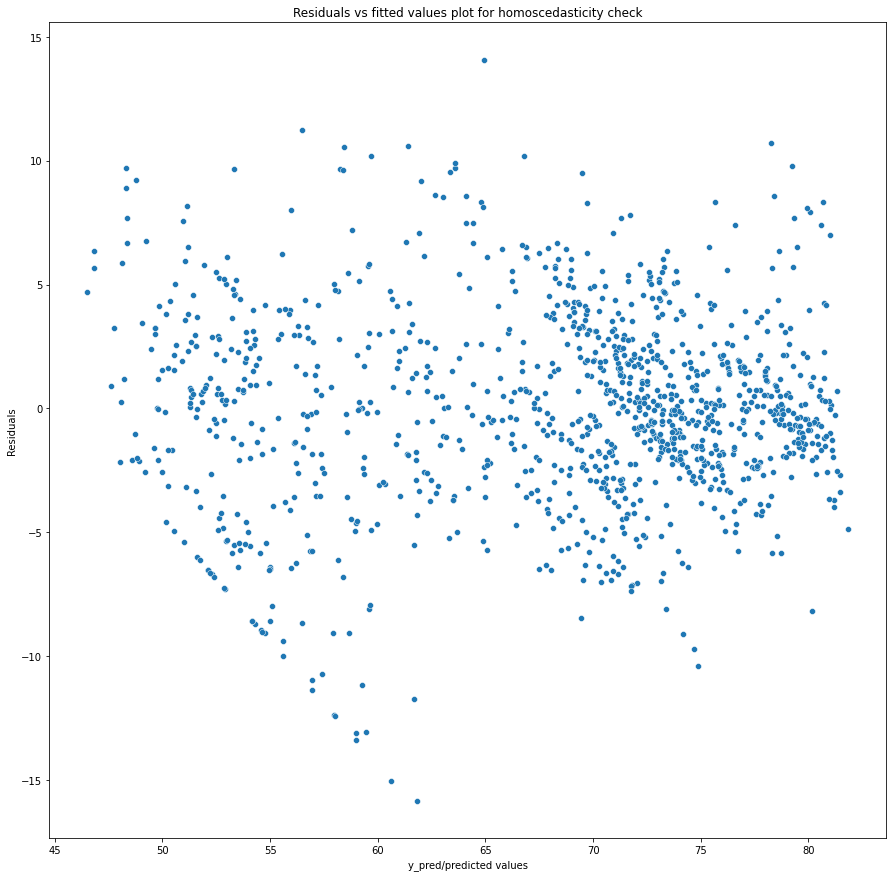

In [43]:
plt.figure(figsize=(15,15))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


**From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.**

In [44]:
# Homoscadasticity

from statsmodels.formula.api import ols

reg = ols("y~x", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     488.9
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        04:55:37   Log-Likelihood:                -4080.1
No. Observations:                1464   AIC:                             8194.
Df Residuals:                    1447   BIC:                             8284.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.3177      1.348     43.273      0.0

**Goldfeld Quandt Test**

**Checking heteroscedasticity :** Using Goldfeld Quandt we test for heteroscedasticity.




> **Null Hypothesis:** Error terms are homoscedastic

> **Alternative Hypothesis:** Error terms are heteroscedastic.





In [45]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.8311035769096169), ('p-value', 0.986266820060806)]

Since p value is greater than 0.05 in Goldfeld Quandt Test.
Therefore, we do not reject Null hypothesis.
Hnece, we Conclude that error terms are homoscedastic.





**Check for Normality of error terms/residuals**

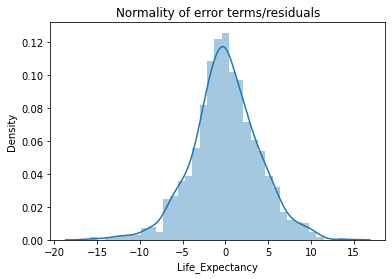

In [46]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

((array([-3.24282596, -2.98103955, -2.83517028, ...,  2.83517028,
          2.98103955,  3.24282596]),
  array([-15.83496687, -15.03614459, -13.39502285, ...,  10.73162518,
          11.23125501,  14.08217852])),
 (3.8916120917535446, -1.180807404323734e-15, 0.9955977060127977))

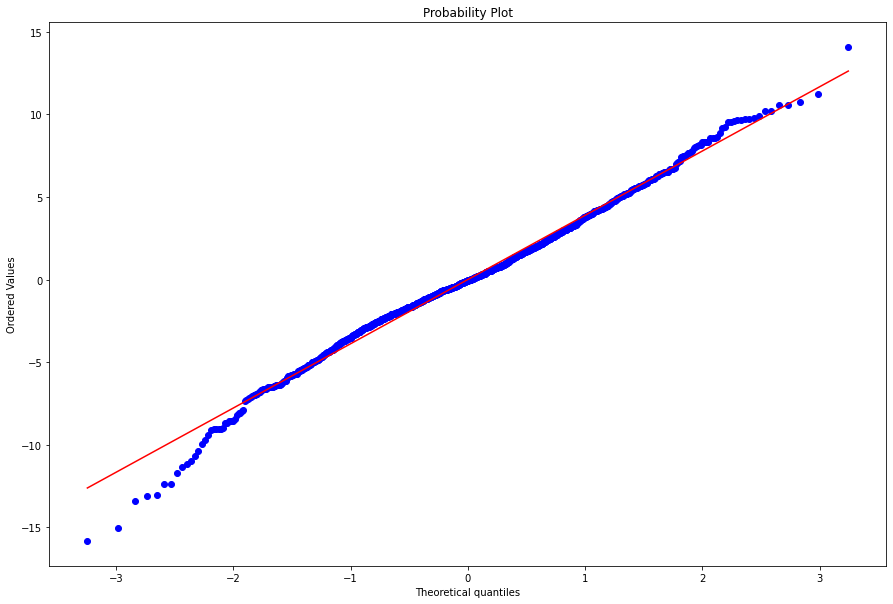

In [47]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize = (15,10))
stats.probplot(residuals, dist = "norm", plot = plt)

**No autocorrelation of residuals**

> When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

> In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

> There should not be autocorrelation in the data so the error terms should not form any pattern.

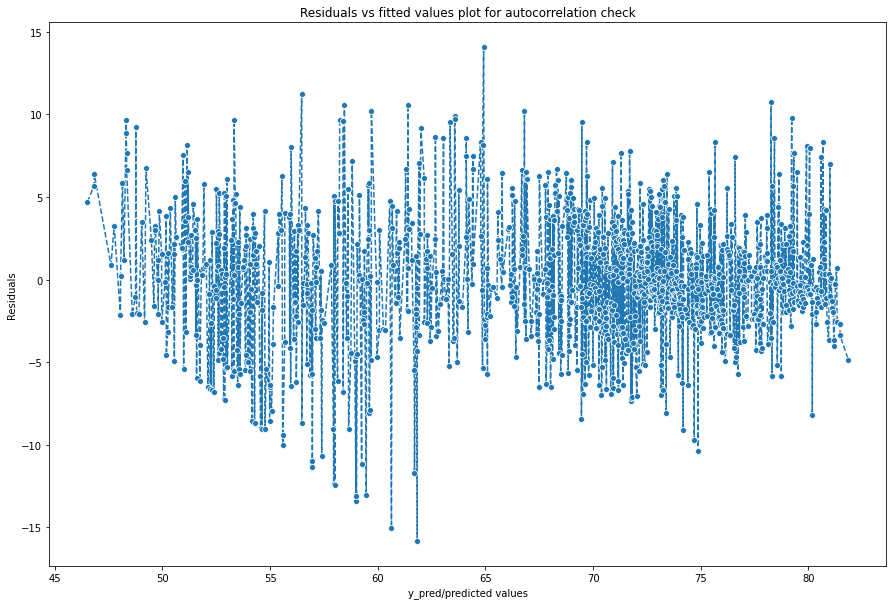

In [48]:
plt.figure(figsize=(15,10))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

**Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.**

> **Null Hypothesis:** Autocorrelation is absent.

> **Alternative Hypothesis:** Autocorrelation is present.

In [49]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.5090391683230923

**Since p value is greater than 0.05 we do not reject the null hypothesis that error terms are not autocorrelated.**

**No perfect multicollinearity**

> In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

**Model Evaluation**

In [50]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [51]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 3.1762519857870712


In [52]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)

RMSE: 4.075804794266856


In [53]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.8306841950984366


In [54]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_predic)
meanSqErr = metrics.mean_squared_error(y_test, y_predic)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predic))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predic)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)


Mean Absolute Error: 3.1762519857870712
Mean Square Error: 16.61218472096869
Root Mean Square Error: 4.075804794266856
Mean Absolute Percenatge Error: 0.0505535743698926


In [55]:
## R Square
corr_matrix = np.corrcoef(y_test, y_predic)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.8322122217775061


In [56]:
## Adjusted R Square
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.841539997777177

**Linearity**


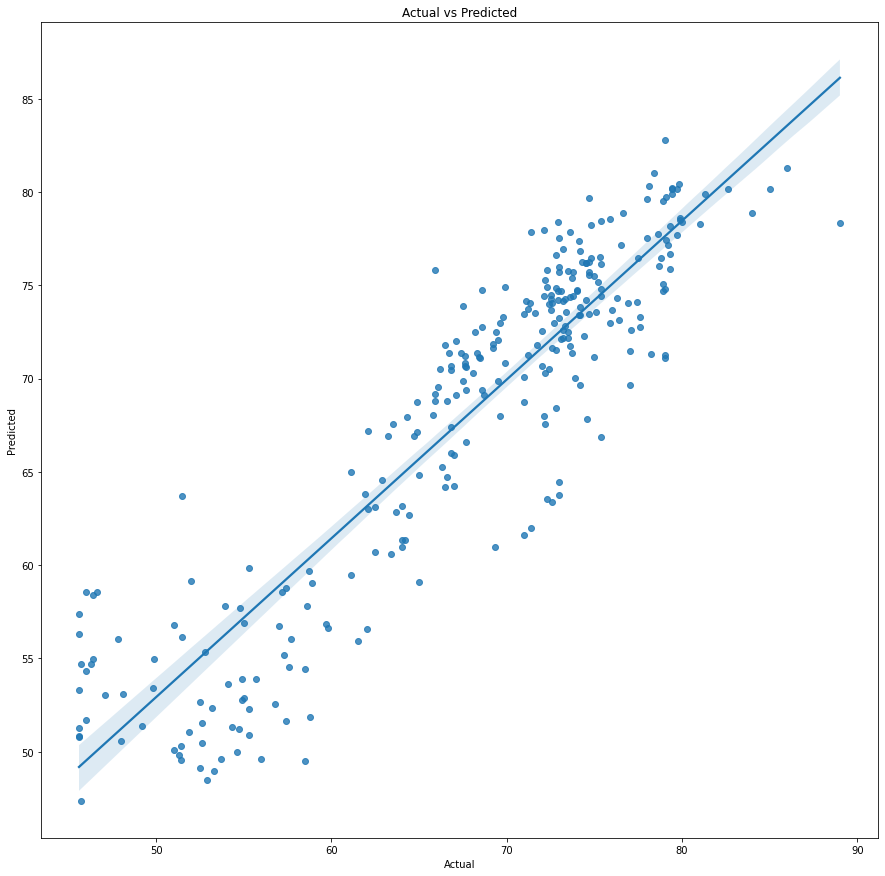

In [57]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_predic)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')